# House Price Prediction Model
In this project, we are building a machine learning model to predict house prices using a dataset from Kaggle: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices). The goal is to create a regression model that accurately predicts house prices based on various features such as location, number of rooms, population, and income levels.

The dataset consists of historical housing data for different districts in California, making it an ideal resource for understanding how features impact property prices.

We will walk through the entire process, including:

- Data preprocessing and exploratory data analysis (EDA) to clean and understand the dataset.
- Building and training a linear regression model to make predictions.
- Evaluating the model’s performance using various metrics.
- Visualizing the results to gain insights into the factors influencing house prices.

**Importing necessary modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

**Reading CSV File**
We will load the dataset into a pandas DataFrame and take a look at the first few rows to understand its structure.

In [3]:
data = pd.read_csv('housing.csv') # Reading CSV file
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Structure of the Data**

Using `data.info()`, we can observe the structure of our dataset. It contains **20,640 entries** and **10 columns**. Here’s a summary of the columns and their data types:

- **Numerical columns (float64)**: 
  - `longitude`, `latitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`
- **Categorical column (object)**:
  - `ocean_proximity`
  
We also notice that the column **`total_bedrooms`** contains **missing values** (20433 non-null entries, compared to 20640 for the other columns). These missing values will need to be addressed before building the model. We will handle this by either filling the missing values or removing the rows with null values.



In [4]:
data.info() # Checking the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Handling Missing Values

Since the `total_bedrooms` column contains missing values, we will remove these rows from the dataset for simplicity. This ensures that our model training data is clean.


In [5]:
data.dropna(inplace=True) # Dropping rows with missing values
data.info() # Checking data after removing missing values

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Splitting the Data into Features (X) and Target (y)
We will now separate our dataset into features (`X`) and the target variable (`y`). The target variable is `median_house_value`, which we aim to predict.

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1) # Features
y = data['median_house_value'] # Target

### Splitting the Data into Training and Test Sets
We split the data into training and test sets to evaluate the model's performance on unseen data. We'll use 80% of the data for training and 20% for testing.

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Preparing Training Data
We will join the training features (`X_train`) and target (`y_train`) back together to perform further analysis, including removing the `ocean_proximity` column, which is categorical.


In [8]:
train_data = X_train.join(y_train) # Joining X_train and y_train
#train_data.drop(['ocean_proximity'],axis=1,inplace=True) # Dropping categorical column
train_data.head() # Displaying the first 5 rows of the cleaned training data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13398,-117.53,34.10,5.0,2185.0,488.0,1379.0,458.0,3.7917,INLAND,103000.0
15882,-122.39,37.74,42.0,4110.0,846.0,2147.0,674.0,2.5694,NEAR BAY,201000.0
13655,-117.31,34.04,5.0,2785.0,577.0,1310.0,536.0,3.3900,INLAND,149500.0
17592,-121.91,37.30,43.0,828.0,151.0,446.0,145.0,4.4375,<1H OCEAN,327600.0
8533,-118.35,33.89,34.0,1740.0,387.0,1249.0,375.0,4.1552,<1H OCEAN,233900.0


### Visualizing the Training Data Distribution
To get an idea of how our numerical features are distributed, we will plot histograms of each column in the dataset.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

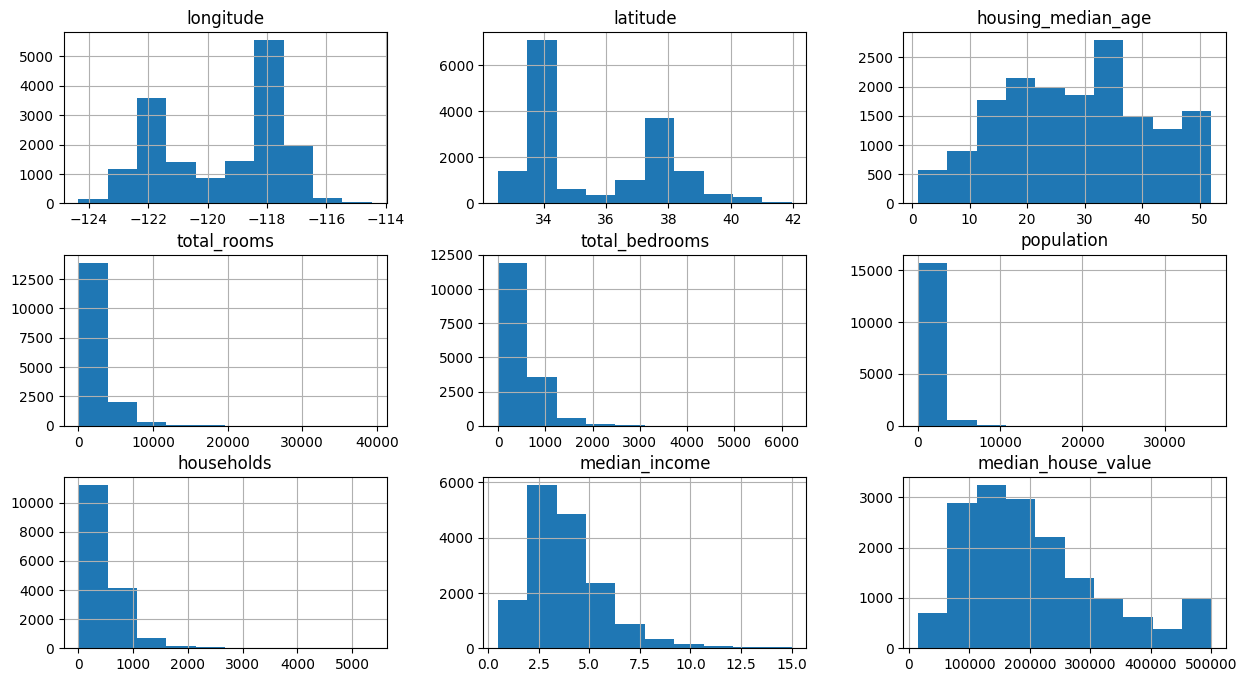

In [9]:
train_data.hist(figsize=(15,8)) # Plotting histograms for numerical columns

### Correlation Matrix
Next, we calculate and visualize the correlation between the features in the dataset. This helps us understand which features have the strongest relationships with the target variable (`median_house_value`).

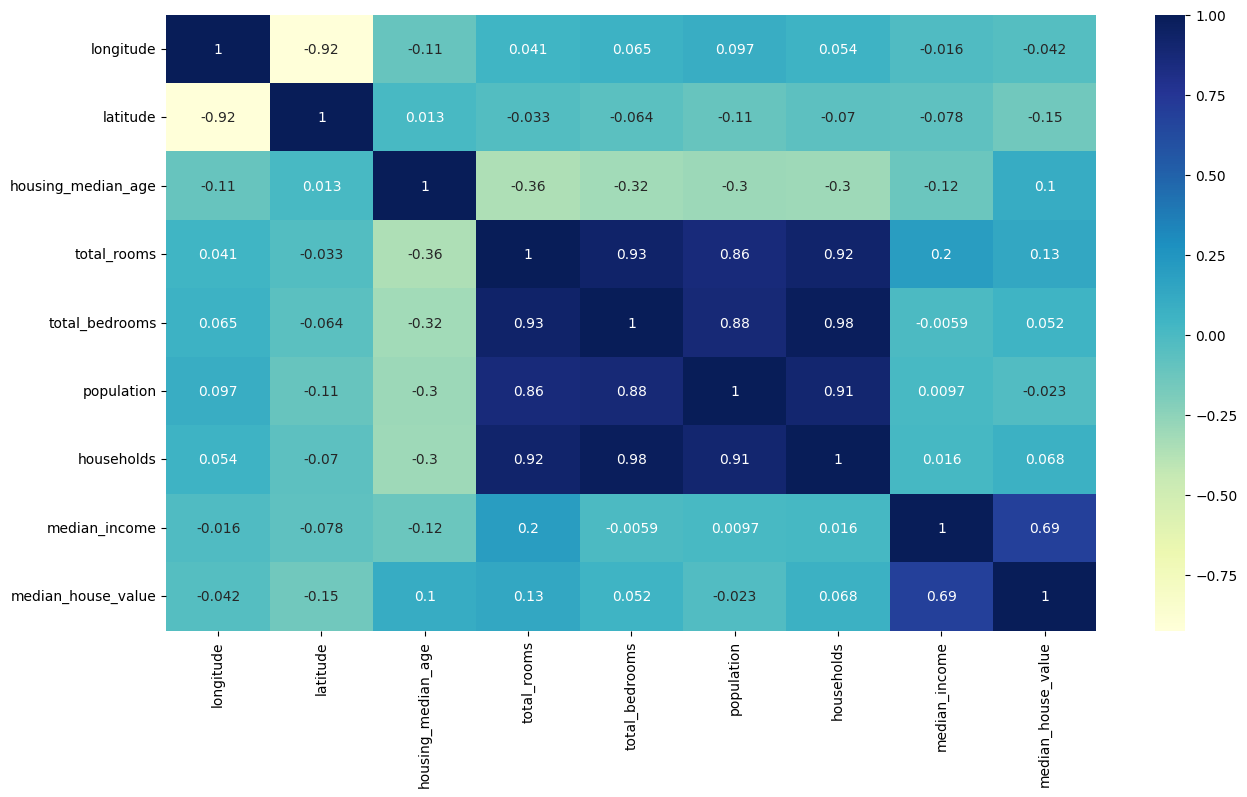

In [10]:
plt.figure(figsize=(15,8))
sn.heatmap(train_data.drop(['ocean_proximity'],axis=1).corr(),annot=True,cmap="YlGnBu") # Plotting correlation heatmap
plt.show()

In [11]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

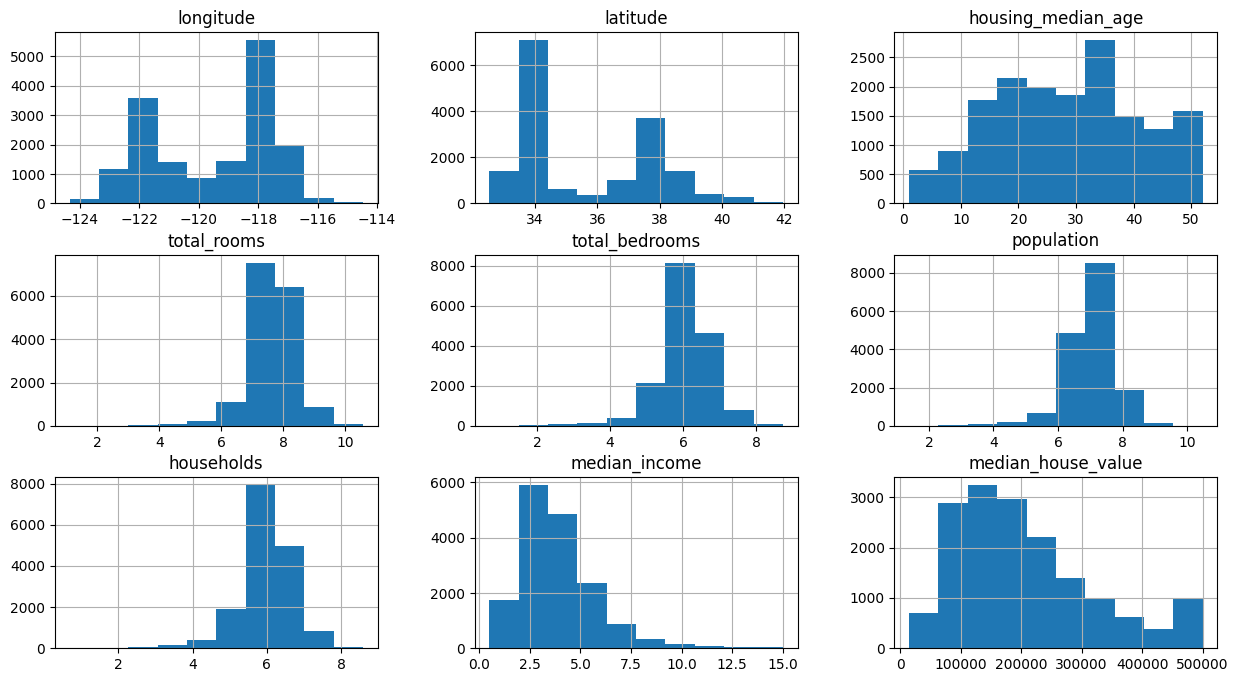

In [12]:
train_data.hist(figsize=(15,8)) # Plotting histograms for numerical columns

In [13]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7207
INLAND        5229
NEAR OCEAN    2072
NEAR BAY      1834
ISLAND           4
Name: count, dtype: int64

In [14]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis=1)

<Axes: >

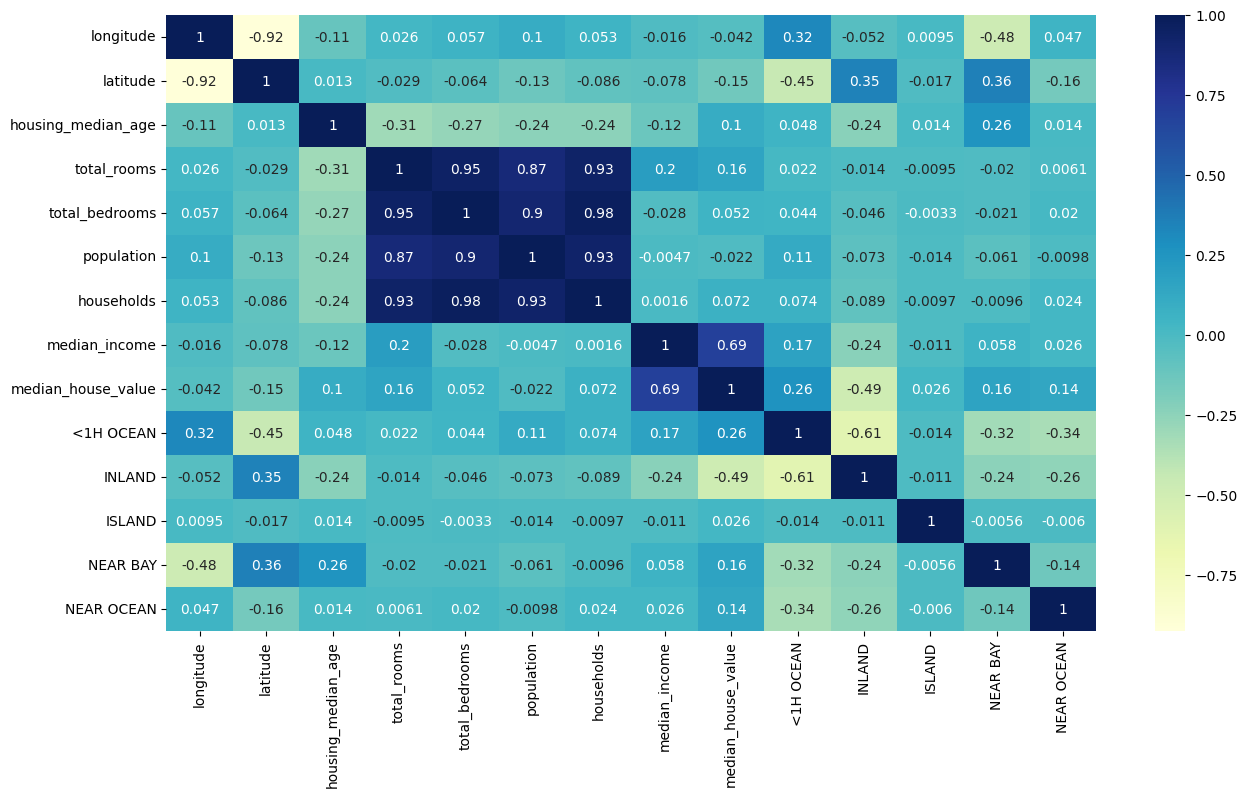

In [15]:
plt.figure(figsize=(15,8))
sn.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

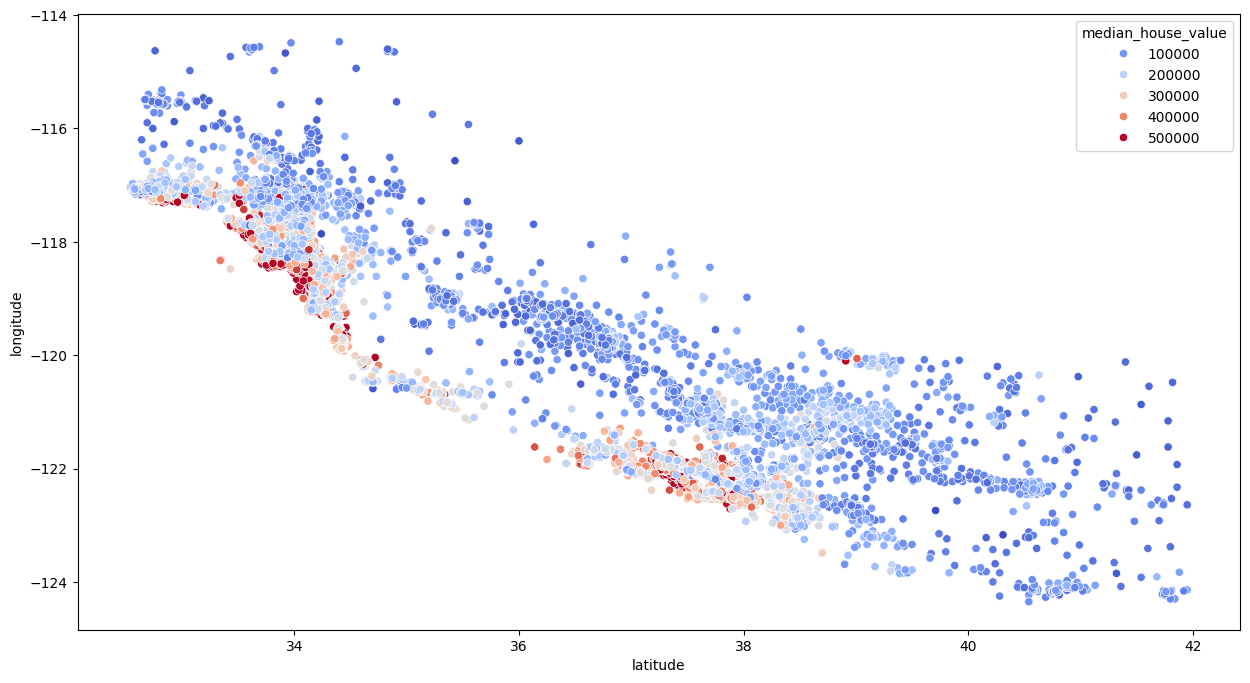

In [16]:
plt.figure(figsize=(15,8))
sn.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")